# KMeans Analysis of Mall Customers Income and Spending Score

* In this KMeans Analysis Method, we handle Annual Income and Spending Score of Customers who came to mall to do shopping.

**Creator**: Anandan Raju

**Objective**: By using this data we're analysing relationship between :
1. **Age Vs Spending Score** for understanding
2. **Annual Income Vs Spending Score** Predominant Output from the data.

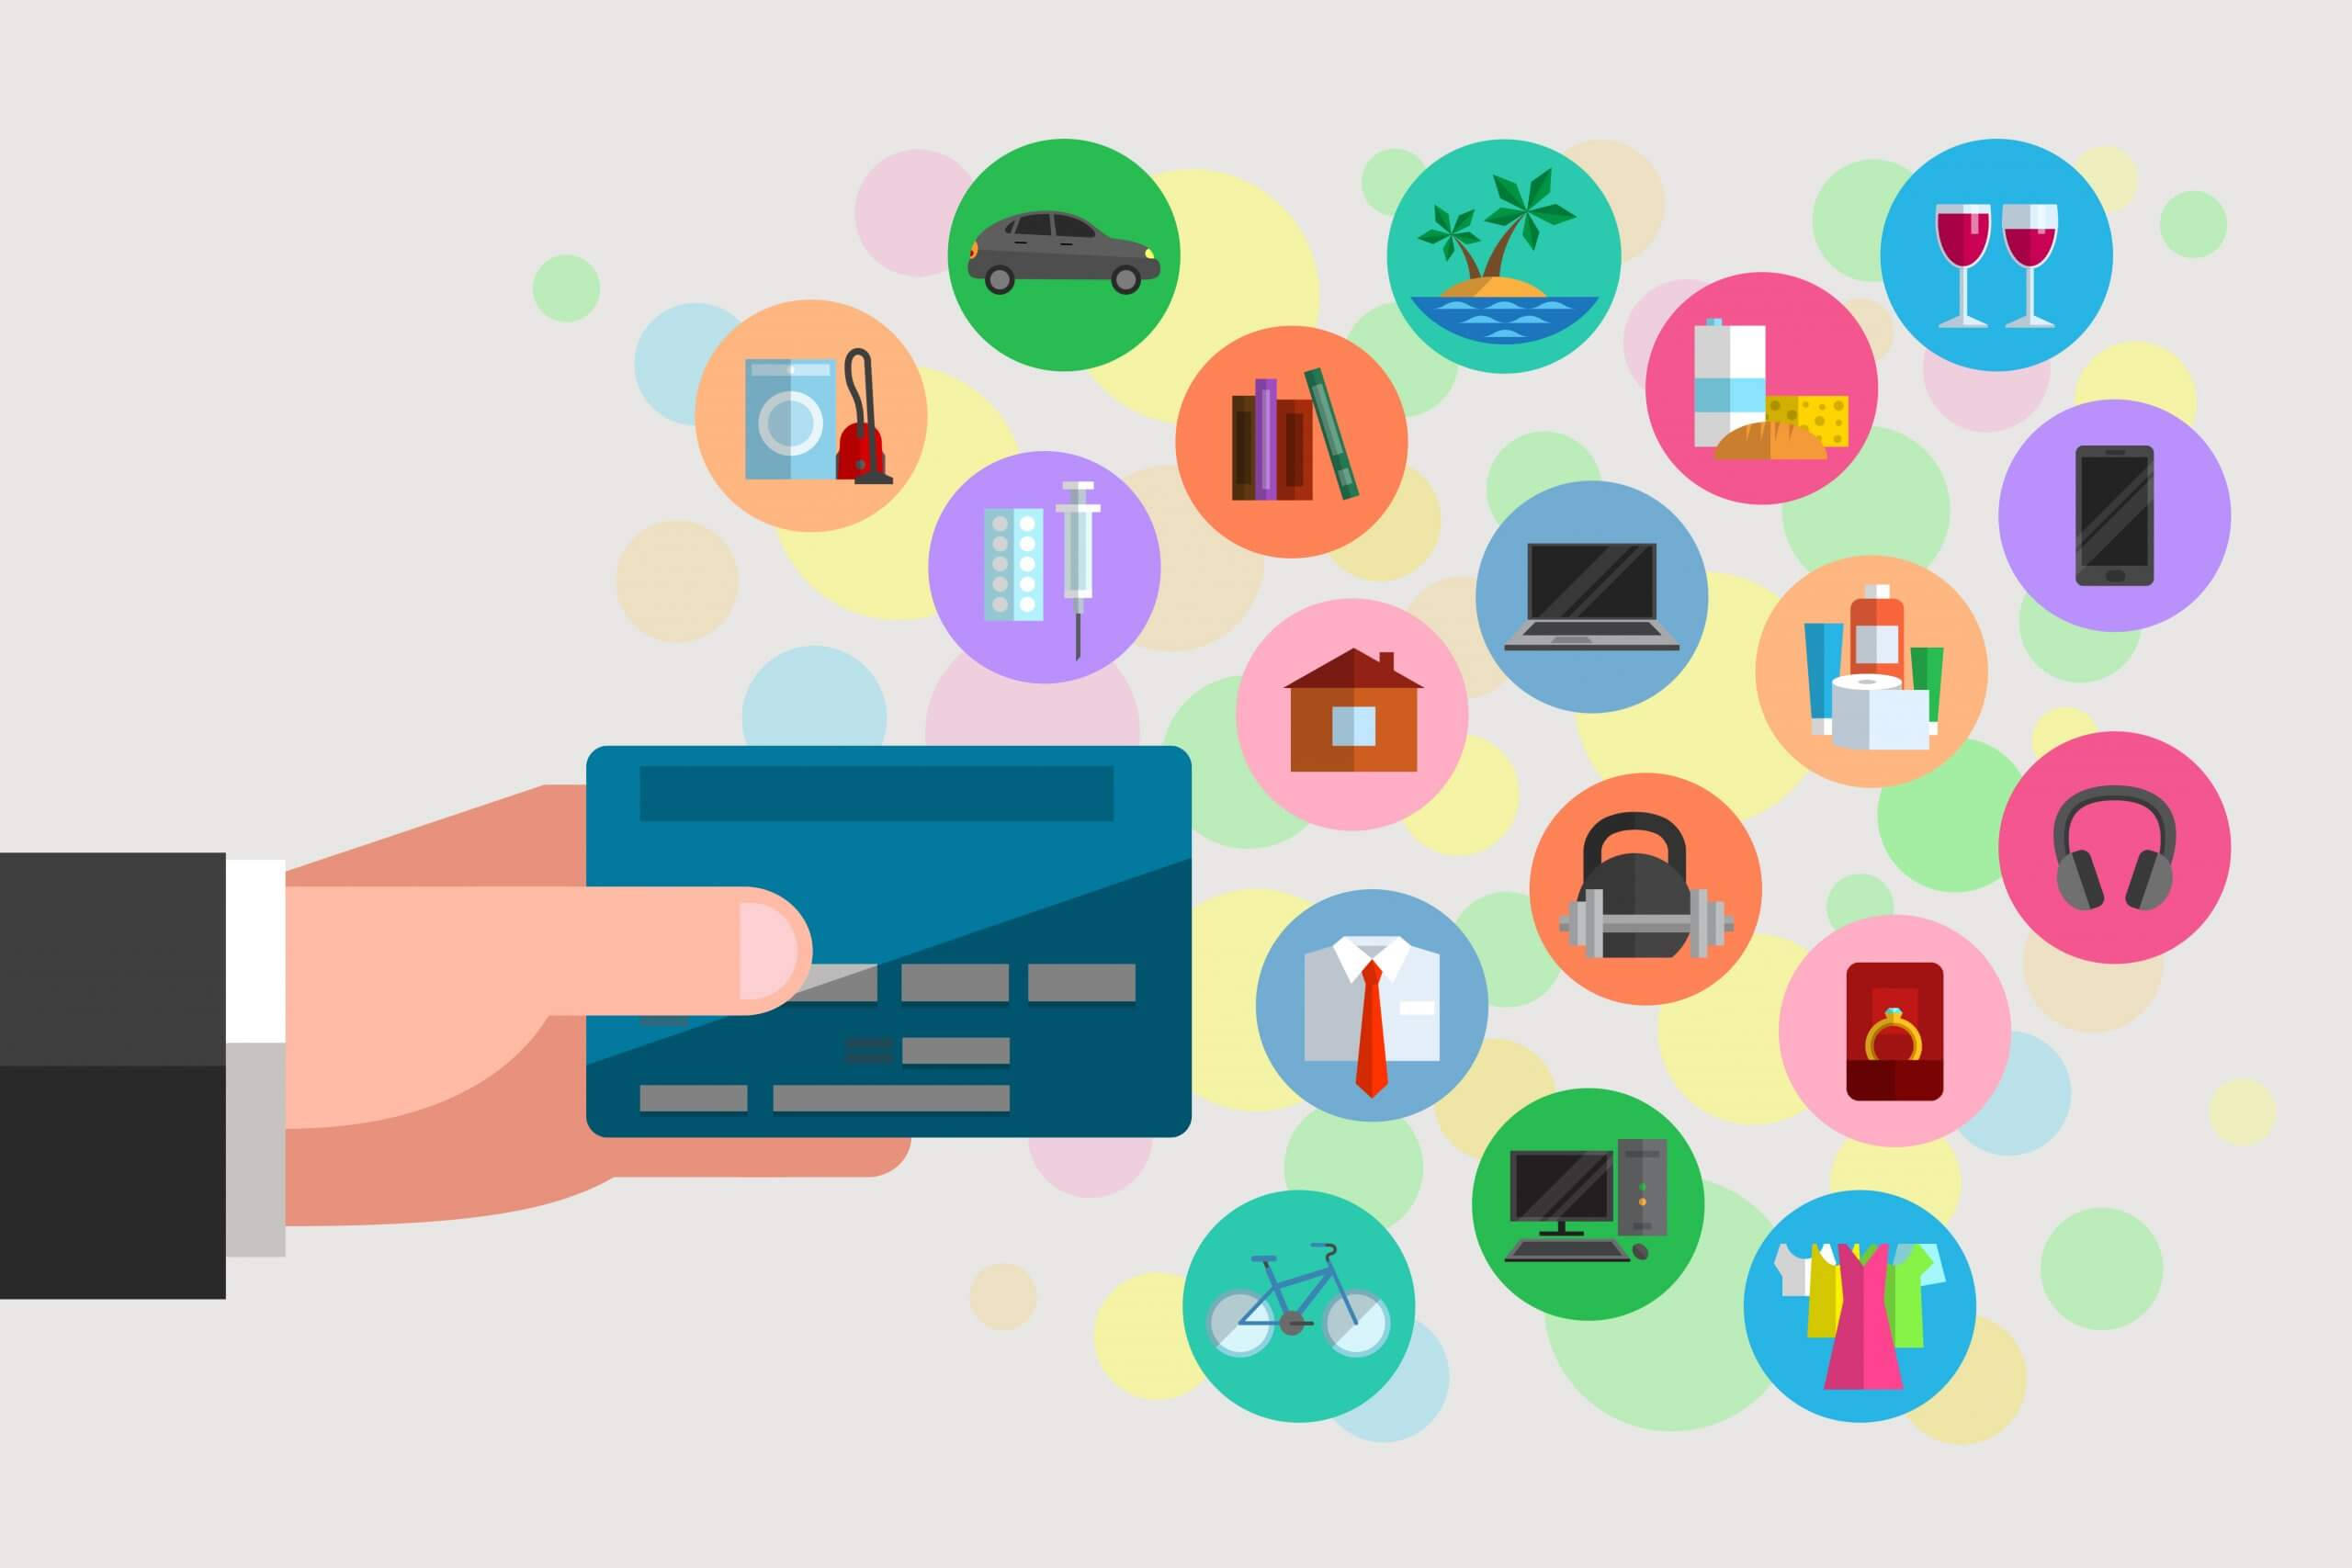

## Table of Contents

1. Import Libraries
2. Checking DataSet
3. Analysing Age Vs Spending Score
    * Segregating DataSet and Zipping Dataset
    * Finding Optimized K Value
4. Analysing Annual Income Vs Spending Score
    * Segregating DataSet and Zipping Dataset
    * Finding Optimized K Value
5. Summary

## 1. Import Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
import warnings
warnings.filterwarnings('ignore')

# 2. Checking Data Set

In [138]:
mall=pd.read_csv('Mall_Customers.csv')
mall.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [140]:
mall.columns[mall.isna().any()]

Index([], dtype='object')

In [141]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [146]:
mall.describe(include='all').T.style.background_gradient(cmap = "YlOrRd")

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Genre,200.000000,0.440000,0.497633,0.000000,0.000000,0.000000,1.000000,1.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [147]:
mall['Genre'].value_counts()

0    112
1     88
Name: Genre, dtype: int64

In [148]:
mall_dict={'Male':1,'Female':0}
for key,val in mall_dict.items():
    mall['Genre']=mall['Genre'].replace(key,val)

In [149]:
mall['Genre'].value_counts()

0    112
1     88
Name: Genre, dtype: int64

In [150]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [151]:
mall.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
mall.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 3. Analysing Age Vs Spending Score

### Segregating and Zipping the Dataset

In [152]:
age=mall['Age'].values
spg_s=mall['Spending_Score'].values
X=np.array(list(zip(age,spg_s)))

In [153]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

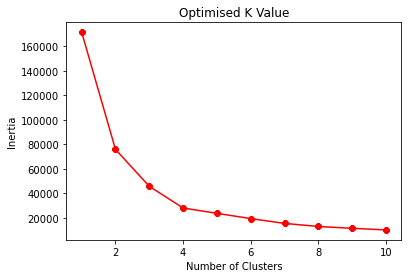

In [154]:
from sklearn.cluster import KMeans

wcs=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    wcs.append(km.inertia_)
    
plt.plot(range(1,11),wcs,color='red',marker='8')
plt.title('Optimised K Value')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Visualizing the Cluster for k-4\
cluster 1: customer with medium age and low spending score\
cluster 2: customer with lower age and high spending score\
cluster 3: customer with lower age and medium spending score\
cluster 4: customer with higher age but medium spending score

Fitting the k-means to the dataset with k=4

In [155]:
model=KMeans(n_clusters=4,random_state=0)
y_means=model.fit_predict(X)

In [156]:
y_means

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [157]:
a=model.cluster_centers_[:,0]
a

array([43.29166667, 30.1754386 , 27.61702128, 55.70833333])

In [158]:
b=model.cluster_centers_[:,1]
b

array([15.02083333, 82.35087719, 49.14893617, 48.22916667])

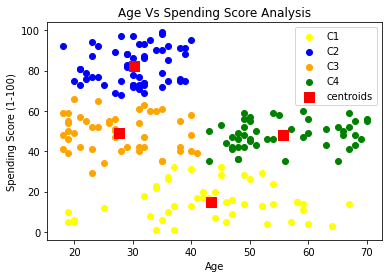

In [159]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='yellow',label='C1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='blue',label='C2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='orange',label='C3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],c='green',label='C4')
fig=plt.scatter(a,b,s=100,marker='s',label='centroids',c='red')
plt.title('Age Vs Spending Score Analysis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 4. Analysing Annual Income Vs Spending Score

### Segregating and Zipping the Dataset

In [160]:
al_inc=mall['Annual_Income'].values
spg_s=mall['Spending_Score'].values
X=np.array(list(zip(al_inc,spg_s)))

In [161]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Finding the optimized K value

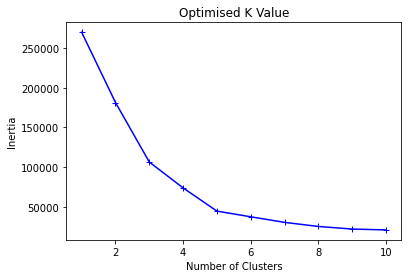

In [162]:
from sklearn.cluster import KMeans

wcs=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    wcs.append(km.inertia_)
    
plt.plot(range(1,11),wcs,color='blue',marker='+')
plt.title('Optimised K Value')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Visualizing the Cluster for k=4
cluster 1: customer with high annual income and high spending score\
cluster 2: customer with low annual income and medium spending score\
cluster 3: customer with high annual income and low spending score\
cluster 4: customer with low annual income and low spending score

In [163]:
model=KMeans(n_clusters=4,random_state=0)
y_means=model.fit_predict(X)
y_means

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [164]:
c=model.cluster_centers_[:,0]
c

array([86.53846154, 48.26      , 87.        , 26.30434783])

In [165]:
d=model.cluster_centers_[:,1]
d

array([82.12820513, 56.48      , 18.63157895, 20.91304348])

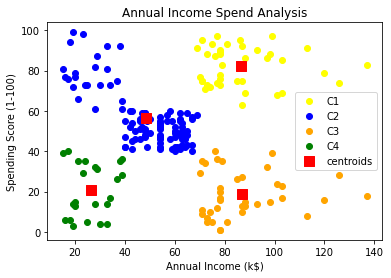

In [169]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='yellow',label='C1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='blue',label='C2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='orange',label='C3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],c='green',label='C4')
fig=plt.scatter(c,d,s=100,marker='s',label='centroids',c='red')
plt.title('Annual Income Spend Analysis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 5. Summary

1. customer data have relation with its **medium age** and **low spending score** 
2. customer data have relation with its **lower age** and **high spending score**
3. customer data have relation with its **lower age** and **medium spending score**
4. customer data have relation with its **higher age** but **medium spending score**
5. customer data have relation with its **high annual income** and **high spending score**
6. customer data have relation with its **low annual income** and **medium spending score**
7. customer data have relation with its **high annual income** and **low spending score**
8. customer data have relation with its **low annual income** and **low spending score**